# Preprocess

## 1. Load data

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

cnt_file = r"D:\bcmi\exp\eeg_cnt_file\huatong_20210323.cnt"

subj_name = cnt_file[cnt_file.rindex('\\')+1 : cnt_file.rindex('_')]
print(subj_name)

EOG_channels = ['VEO', 'HEO']
unused_channels = ['M1', 'M2']

raw = mne.io.read_raw_cnt(cnt_file, eog=EOG_channels)
raw.info['bads'].extend(EOG_channels)
raw.info['bads'].extend(unused_channels)

huatong


<ipython-input-1-8dbc731da5a8>:15: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  raw = mne.io.read_raw_cnt(cnt_file, eog=EOG_channels)


In [2]:
raw.info

<Info | 9 non-empty values
 bads: 4 items (VEO, HEO, M1, M2)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG, 2 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

In [2]:
# M1, M2, VEO, HEO
raw.info['ch_names']

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'VEO',
 'HEO']

In [3]:
# number of time points
raw.n_times

2301320

In [4]:
len(raw.ch_names)

66

In [5]:
m = raw.get_montage()
m

## 2. Filtering & Downsample
No occurence of AC power line interference.

In [2]:
raw.load_data()

# Downsample the data and events at the same time
raw_bandpass_downsample = raw.copy().filter(l_freq=1, h_freq=75).resample(200)

Reading 0 ... 2301319  =      0.000 ...  2301.319 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 75 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 75.00 Hz
- Upper transition bandwidth: 18.75 Hz (-6 dB cutoff frequency: 84.38 Hz)
- Filter length: 3301 samples (3.301 sec)



## 3. Mark bad channels

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

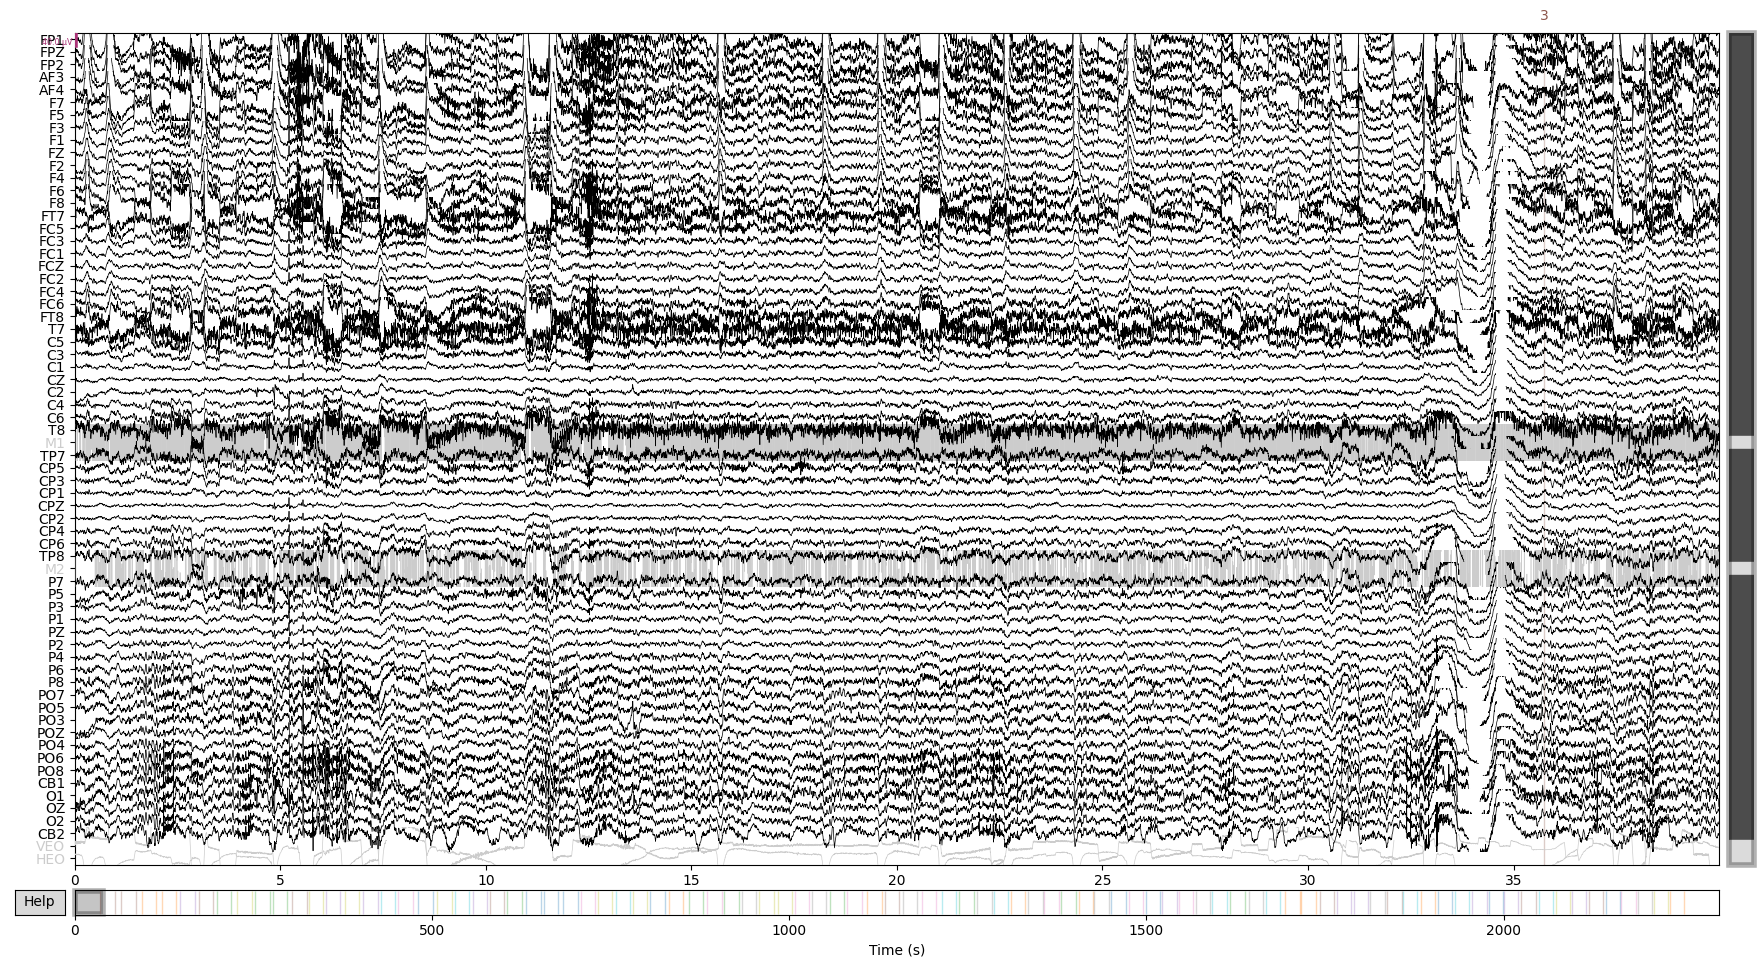

In [3]:
raw_bandpass_downsample.plot(duration=40, n_channels=66)

In [4]:
bad_channels = ['O1', 'O2', 'OZ', 'T8', 'CB2']
raw_bandpass_downsample.info['bads'].extend(bad_channels)
# the plot after bandpass is much better
raw_bandpass_downsample.plot(duration=40, n_channels=66)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [7]:
raw_bandpass_downsample.info

<Info | 9 non-empty values
 bads: 9 items (VEO, HEO, M1, M2, O1, O2, OZ, T8, CB2)
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG, 2 EOG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 75.0 Hz
 meas_date: unspecified
 nchan: 66
 projs: []
 sfreq: 200.0 Hz
 subject_info: 5 items (dict)
>

## 4. Set average reference ???

In [8]:
raw_bandpass_downsample.set_eeg_reference(ref_channels='average')
fig2 = raw_bandpass_downsample.plot(duration=40, n_channels=66)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## 5. Repair bad channels

In [5]:
# mne montages
montage_dir = os.path.join(os.path.dirname(mne.__file__), 'channels', 'data', 'montages')

print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'artinis-brite23.elc', 'artinis-octamon.elc', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [20]:
from collections import OrderedDict

montage_fpath = r"D:\bcmi\EMBC\Scan-SynAmps2-Quik-Cap64\SynAmps2 Quik-Cap64.DAT"

with open(montage_fpath, 'r') as fid:
    lines = fid.readlines()

ch_names, poss = list(), list()
nasion = lpa = rpa = None
for i, line in enumerate(lines):
    items = line.split()
    pos = np.array([float(item) for item in items[1:]])
    if items[0]=='Centroid' or items[0]=='EKG' or items[0]=='EMG' or items[0]=='REF.':
        continue
    elif items[0] == 'Nasion':
        nasion = pos
    elif items[0] == 'Left':
        lpa = pos
    elif items[0] == 'Right':
        rpa = pos
    else:
        ch_names.append(items[0].upper())
        poss.append(pos)

electrodes = OrderedDict(zip(ch_names, poss))
extended_1020_montage = mne.channels.make_dig_montage(electrodes, nasion, lpa, rpa)

print(extended_1020_montage)
print(len(extended_1020_montage.ch_names))
extended_1020_montage.ch_names

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 66 channels>
66


['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'VEO',
 'HEO']

Creating RawArray with float64 data, n_channels=66, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Creating RawArray with float64 data, n_channels=66, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

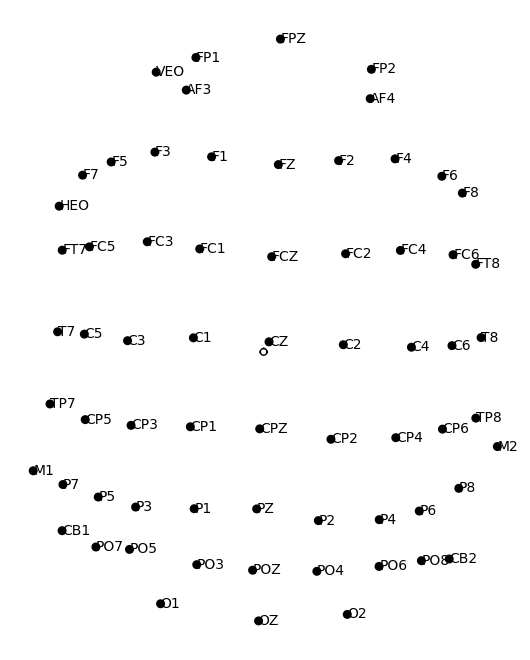

In [21]:
# visualize
fig_3d = extended_1020_montage.plot(kind='3d')
fig_3d.gca().view_init(azim=70, elev=15)
extended_1020_montage.plot(kind='topomap', show_names=True)

In [22]:
raw_bandpass_downsample.set_montage(extended_1020_montage, on_missing='warn')

<RawCNT | leixiaoting_20210324.cnt, 66 x 549616 (2748.1 s), ~276.8 MB, data loaded>

Interpolating bad channels
    Automatic origin fit: head of radius 9238.9 mm
Computing interpolation matrix from 57 sensor positions
Interpolating 5 sensors


<ipython-input-24-dff1679e4a68>:1: RuntimeWarning: Estimated head size (9238.9 mm) exceeded 99th percentile for adult head size
  raw_bandpass_downsample_interp = raw_bandpass_downsample.interpolate_bads(reset_bads=False, exclude=unused_channels+EOG_channels)
<ipython-input-24-dff1679e4a68>:1: RuntimeWarning: (X, Y) fit (82.9, 355.2) more than 20 mm from head frame origin
  raw_bandpass_downsample_interp = raw_bandpass_downsample.interpolate_bads(reset_bads=False, exclude=unused_channels+EOG_channels)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

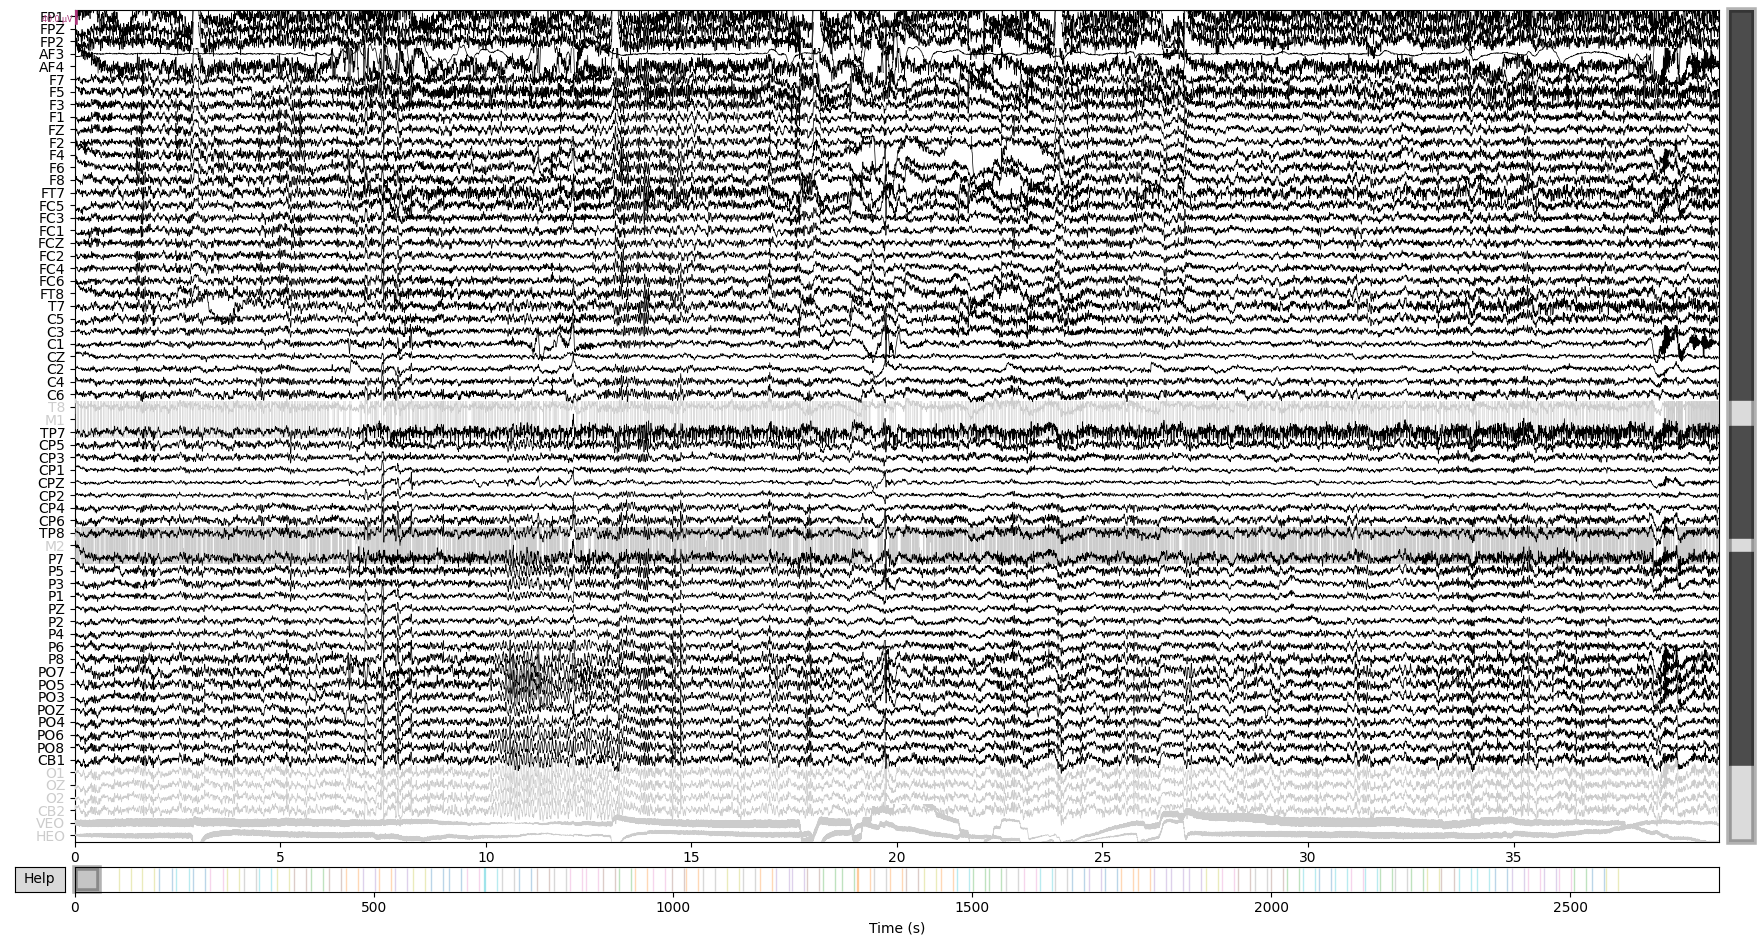

In [24]:
raw_bandpass_downsample_interp = raw_bandpass_downsample.interpolate_bads(reset_bads=False, exclude=unused_channels+EOG_channels)

raw_bandpass_downsample_interp.plot(duration=40, n_channels=66)

## 6. Remove artifacts with ICA
### 6.1 Visualize EOG artifact

Using EOG channels: VEO, HEO
EOG channel index for this subject is: [64 65]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 967 significant peaks
Number of EOG events detected: 967
Not setting metadata
Not setting metadata
967 matching events found
No baseline correction applied
Loading data for 967 events and 201 original time points ...
2 bad epochs dropped
Applying baseline correction (mode: mean)
No projector s

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

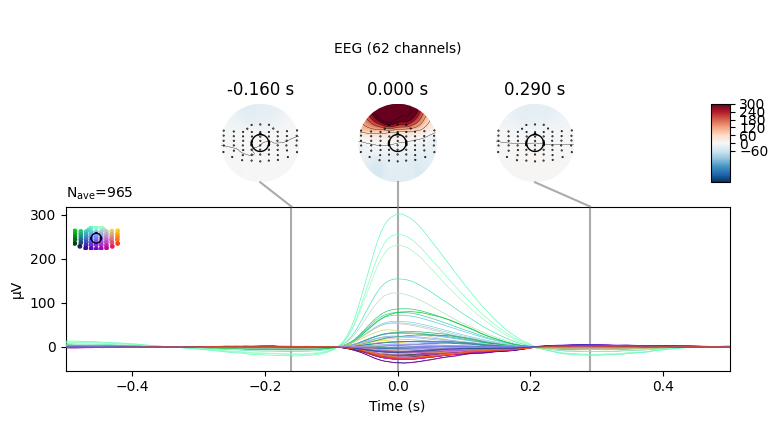

In [8]:
from mne.preprocessing import create_eog_epochs

eog_evoked = create_eog_epochs(raw_bandpass_downsample, ch_name=EOG_channels).average()
eog_evoked.apply_baseline(baseline=(None, -0.2))
eog_evoked.plot_joint()

### 6.2 Visualize ECG artifact

In [10]:
from mne.preprocessing import create_ecg_epochs

ecg_evoked = create_ecg_epochs(raw_bandpass_downsample).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

ValueError: Unable to generate artificial ECG channel

### 6.3 ICA
Decompose

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 4.4s.
Creating RawArray with float64 data, n_channels=5, n_times=460264
    Range : 0 ... 460263 =      0.000 ...  2301.315 secs
Ready.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

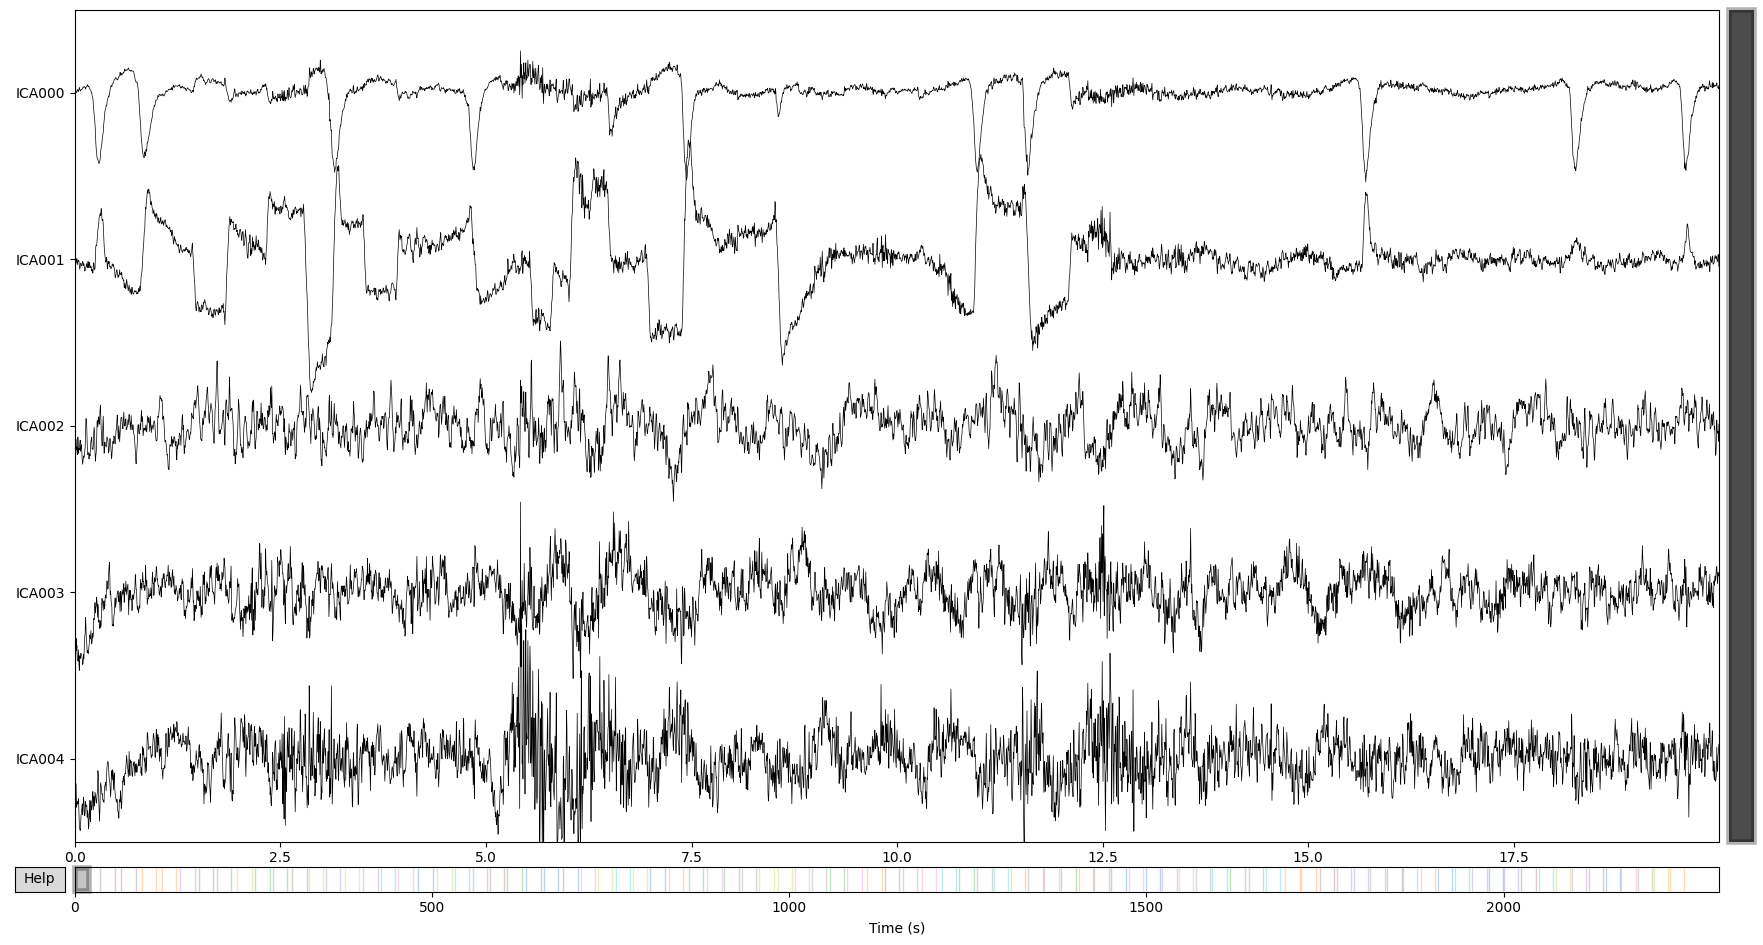

In [4]:
from mne.preprocessing import ICA

ica = ICA(n_components=5, max_iter='auto', random_state=97)
ica.fit(raw_bandpass_downsample)

# plot the unfiltered raw file
ica.plot_sources(raw_bandpass_downsample)

Exclude artifact components.

Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 2 ICA components
    Projecting back using 62 PCA components


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

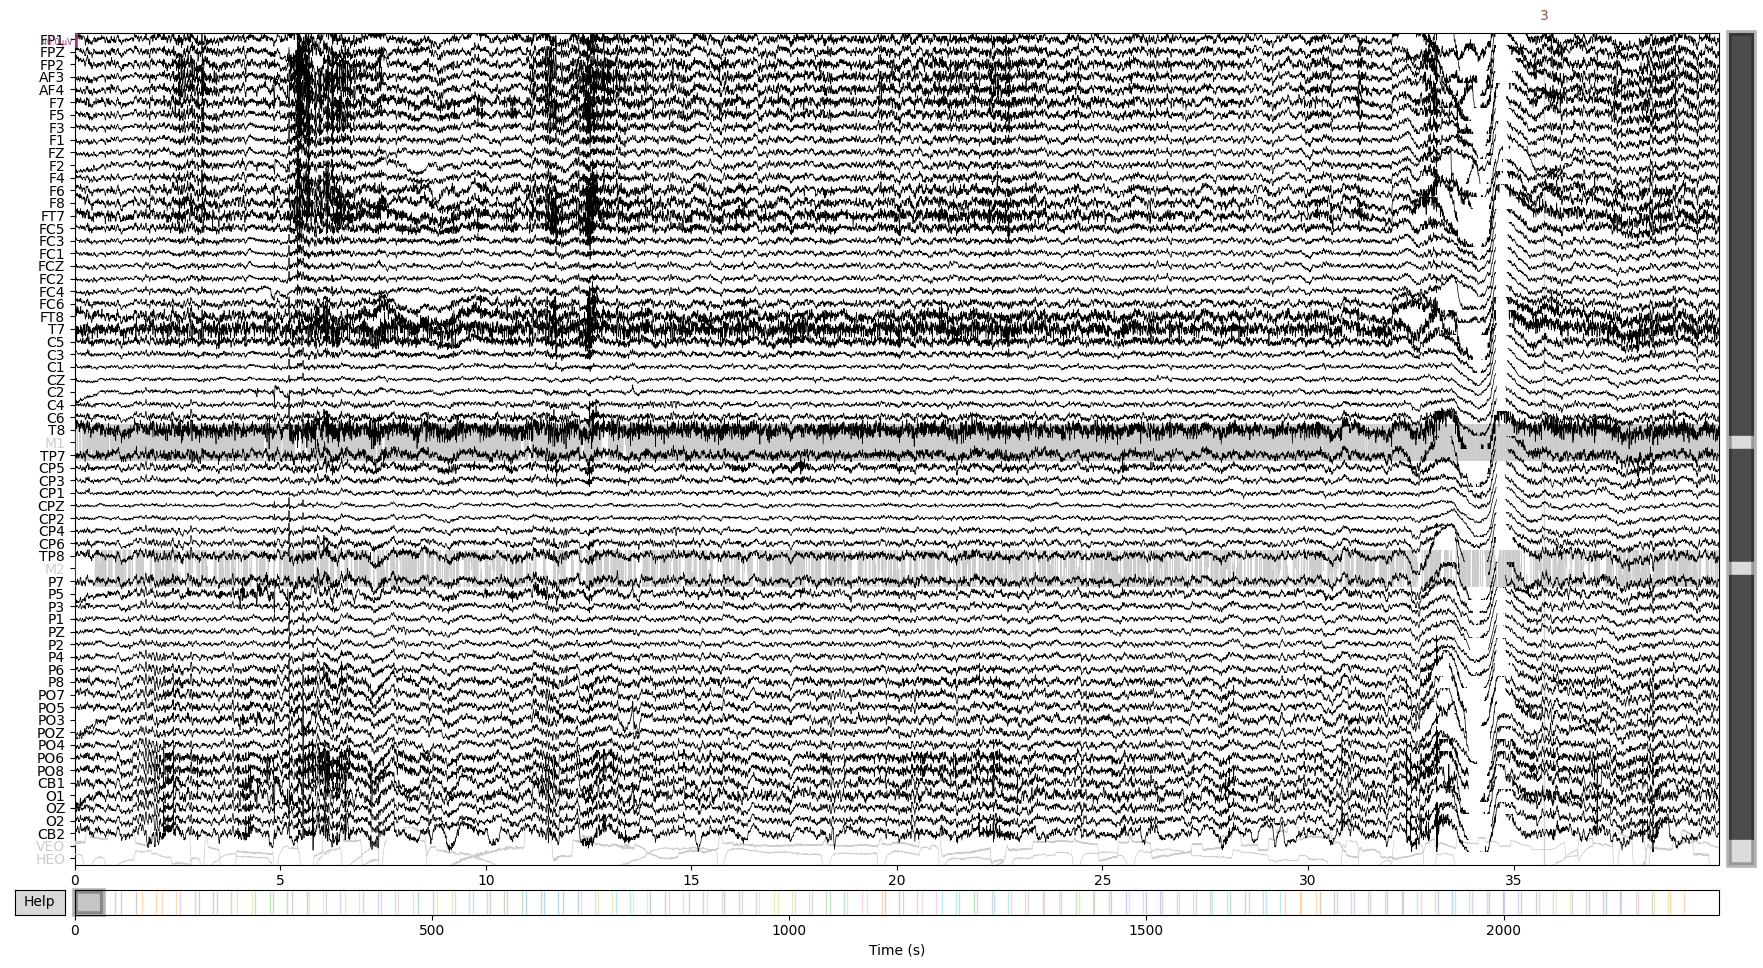

In [5]:
ica.exclude = [0, 1]  # indices chosen based on plots above

# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_raw = raw_bandpass_downsample.copy()
ica.apply(reconst_raw)

raw_bandpass_downsample.plot(duration=40, n_channels=66)
reconst_raw.plot(duration=40, n_channels=66)

In [6]:
del raw_bandpass_downsample

## 7. Extract trigger events && Epoching && Drop bad epochs

In [7]:
events, event_id = mne.events_from_annotations(reconst_raw)

Used Annotations descriptions: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90']


In [16]:
type(events), type(event_id)

(numpy.ndarray, dict)

In [ ]:
# the trigger number represents image number
# check psychopy code
event_id.keys()

In [ ]:
len(event_id.keys())

In [ ]:
event_id['1'], type(event_id['1'])

In [8]:
events.shape

(180, 3)

In [18]:
# (sample number, _, event code)
events[:10]

array([[ 7149,     0,    23],
       [11171,     0,    23],
       [12955,     0,    14],
       [16997,     0,    14],
       [18807,     0,    56],
       [22831,     0,    56],
       [24336,     0,    11],
       [28393,     0,    11],
       [29570,     0,    76],
       [33611,     0,    76]])

In [9]:
import numpy as np

# only the start trigger is needed
choice = np.ones(180)

for i in range(1, 180, 2):
    choice[i] = 0

choice = (choice == 1)
events = events[choice]

events.shape, events[:10]

((90, 3),
 array([[ 7149,     0,    23],
        [12955,     0,    14],
        [18807,     0,    56],
        [24336,     0,    11],
        [29570,     0,    76],
        [34688,     0,    50],
        [39734,     0,    66],
        [45401,     0,    53],
        [50484,     0,    39],
        [55394,     0,    57]]))

In [10]:
useful_channels = raw.ch_names[:]

for ch in unused_channels:
    useful_channels.remove(ch)

for ch in EOG_channels:
    useful_channels.remove(ch)

epochs = mne.Epochs(reconst_raw, events, tmin=-0.3, tmax=20, picks=useful_channels)


Not setting metadata
Not setting metadata
90 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [21]:
epochs

<Epochs |  90 events (good & bad), -0.3 - 20 sec, baseline -0.3 – 0 sec, ~64 kB, data not loaded,
 '1': 1
 '10': 1
 '11': 1
 '12': 1
 '13': 1
 '14': 1
 '15': 1
 '16': 1
 '17': 1
 '18': 1
 '19': 1
 '2': 1
 '20': 1
 '21': 1
 '22': 1
 '23': 1
 '24': 1
 '25': 1
 '26': 1
 '27': 1
 '28': 1
 '29': 1
 '3': 1
 '30': 1
 '31': 1
 '32': 1
 '33': 1
 '34': 1
 '35': 1
 '36': 1
 '37': 1
 '38': 1
 '39': 1
 '4': 1
 '40': 1
 '41': 1
 '42': 1
 '43': 1
 '44': 1
 '45': 1
 '46': 1
 '47': 1
 '48': 1
 '49': 1
 '5': 1
 '50': 1
 '51': 1
 '52': 1
 '53': 1
 '54': 1
 '55': 1
 '56': 1
 '57': 1
 '58': 1
 '59': 1
 '6': 1
 '60': 1
 '61': 1
 '62': 1
 '63': 1
 '64': 1
 '65': 1
 '66': 1
 '67': 1
 '68': 1
 '69': 1
 '7': 1
 '70': 1
 '71': 1
 '72': 1
 '73': 1
 '74': 1
 '75': 1
 '76': 1
 '77': 1
 '78': 1
 '79': 1
 '8': 1
 '80': 1
 '81': 1
 '82': 1
 '83': 1
 '84': 1
 '85': 1
 '86': 1
 '87': 1
 '88': 1
 '89': 1
 '9': 1
 '90': 1>

In [24]:
print(epochs.event_id)

{'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90}


# ERP

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

    Using multitaper spectrum estimation with 7 DPSS windows


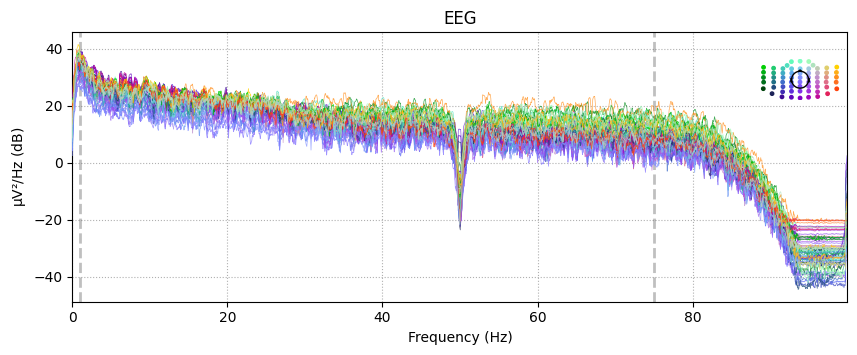

In [17]:
epochs['1'].plot_psd()

    Using multitaper spectrum estimation with 7 DPSS windows


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

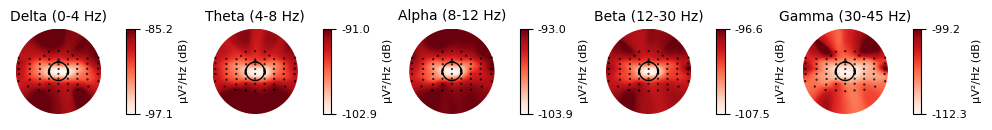

In [18]:
epochs['1'].plot_psd_topomap()

# Export npy

In [26]:
epochs['1'].get_data().shape

Loading data for 1 events and 4061 original time points ...
0 bad epochs dropped


(1, 62, 4061)

In [28]:
test = np.squeeze(epochs['1'].get_data(), axis=0)[:, :4000]
test.shape

Loading data for 1 events and 4061 original time points ...
0 bad epochs dropped


(62, 4000)

In [11]:
# process labels
import csv

labels = {}

psyfile = r"D:\bcmi\exp\psychopy_export\huatong.csv"

with open(psyfile, 'r', newline='') as psyf:
    reader = csv.DictReader(psyf)
    for row in reader:
        img_name = row['imageName']
        img_no = int(img_name[:img_name.rindex('.')])
        if row[' category'] == '负向':
            emotion_label = 0
        elif row[' category'] == '中性':
            emotion_label = 1
        elif row[' category'] == '正向':
            emotion_label = 2
        else:
            print('error')
        
        labels[img_no] = emotion_label

print(labels)

{3: 2, 21: 0, 6: 0, 19: 0, 78: 2, 54: 2, 69: 0, 57: 0, 44: 2, 60: 1, 46: 2, 32: 2, 53: 1, 40: 1, 37: 2, 66: 1, 8: 0, 1: 2, 9: 1, 82: 2, 45: 0, 87: 0, 77: 2, 50: 2, 26: 0, 59: 1, 63: 1, 81: 1, 41: 0, 65: 2, 42: 1, 68: 1, 28: 0, 47: 1, 2: 0, 4: 0, 49: 1, 24: 1, 55: 1, 31: 2, 85: 2, 22: 1, 43: 2, 70: 1, 48: 0, 14: 0, 74: 1, 36: 1, 64: 0, 17: 2, 27: 1, 72: 2, 39: 2, 11: 0, 84: 2, 56: 1, 83: 0, 71: 0, 34: 0, 29: 0, 88: 2, 15: 2, 33: 0, 52: 2, 23: 0, 5: 0, 35: 0, 51: 0, 38: 1, 86: 0, 61: 1, 80: 0, 79: 2, 58: 1, 76: 1, 75: 1, 25: 2, 12: 2, 67: 2, 7: 2, 62: 1, 90: 1, 16: 0, 20: 0, 13: 2, 18: 2, 30: 2, 89: 2, 73: 0, 10: 2}


In [14]:
positive_count = 0
neutral_count = 0
negative_count = 0

for k, v in labels.items():
    if v == 0:
        negative_count += 1
    elif v == 1:
        neutral_count += 1
    else:
        positive_count += 1

positive_count, neutral_count, negative_count

(32, 27, 31)

In [12]:
# For this subject
# (number of images, 6(1 total+5 frequency bands), number of channels, sample numbers)
# (90, 6, 62, 4000) 20s/image, 200Hz

bands = ['delta', 'theta', 'alpha', 'beta', 'gamma']
lows = [1, 4, 8, 14, 31]
highs = [4, 8, 14, 31, 50]

datas = []
labs = []
epochs.load_data()
for img in range(1, 91):
    data = []
    img_epoch = epochs[str(img)]
    # data.append(np.squeeze(img_epoch.get_data(), axis=0)[:, :4000])
    data.append(img_epoch.get_data()[:, :, :4000])

    for b in range(5):
        data.append(img_epoch.copy().filter(l_freq=lows[b], h_freq=highs[b]).get_data()[:, :, :4000])
    
    datas.append(np.expand_dims(np.concatenate(data, axis=0), axis=0))
    labs.append(labels[img])

subj_data = np.concatenate(datas, axis=0)
subj_label = np.array(labs)

print(subj_data.shape, subj_label.shape)

out_dir = './npydata'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

np.save(out_dir+'/huatong_data.npy', subj_data)
np.save(out_dir+'/huatong_label.npy', subj_label)


Loading data for 90 events and 4061 original time points ...
0 bad epochs dropped
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 661 samples (3.305 sec)

Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz


In [13]:
subj_data.dtype, subj_label.dtype

(dtype('float64'), dtype('int32'))

In [15]:
90 * 6 * 62 * 4000 * 8

1071360000

In [16]:
90 * 4

360